In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
wnl=nltk.WordNetLemmatizer()
from wordcloud import WordCloud
import re
os.getcwd()
import pickle

In [2]:
emails=pd.read_csv('C://Users//j seshadri reddy//Downloads//emails1(1).csv')
emails.head()


,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [3]:
emails.columns


Index(['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class'], dtype='object')

In [4]:
emails.shape

(48076, 5)

In [5]:
##considering content and class columns
emaildata=emails.iloc[:,3:]


In [6]:
emaildata.columns


Index(['content', 'Class'], dtype='object')

In [7]:
emaildata.shape


(48076, 2)

In [8]:
emaildata=emaildata.drop_duplicates(subset='content')



In [9]:
email_count=emaildata.groupby('Class').count()##email count according to Class


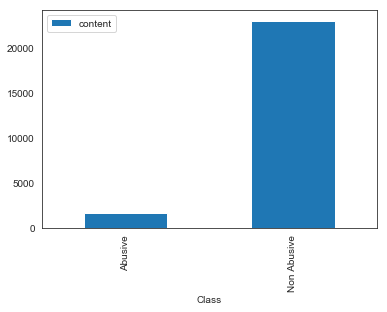

In [10]:
email_count.plot.bar(ylim=0);plt.show()


In [11]:
## checking null values
emaildata.isnull().sum()#0

content    0
Class      0
dtype: int64

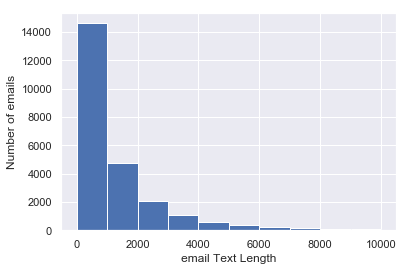

In [12]:
emaildata['char_count']=emaildata['content'].str.len()
sns.set()
bin_edges=[0,1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000 ]
plt.hist(x='char_count', data=emaildata, bins=bin_edges)
plt.xlabel('email Text Length')
plt.ylabel('Number of emails')
plt.figsize=(10, 16)

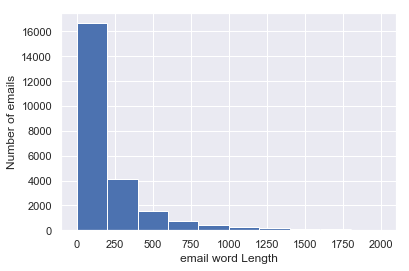

In [13]:
emaildata['word_count']=emaildata['content'].apply(lambda x: len(str(x).split(" ")))
bin_edges=[0,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000 ]
plt.hist(x='word_count', data=emaildata, bins=bin_edges)
plt.xlabel('email word Length')
plt.ylabel('Number of emails')
plt.figsize=(10, 16)


In [14]:
emaildata['content']= emaildata['content'].apply(lambda x:(re.sub(r"http\S+", "",x))) 
stop=stopwords.words('english')



In [15]:
emaildata['content']=emaildata['content'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
corpus=[]
def data_clean(data):
    wnl=nltk.WordNetLemmatizer()
    for i in data:
        email=re.sub('[^a-zA-Z]',' ',str(i))
        email=email.lower()
        email=email.split()
        email=[wnl.lemmatize(word) for word in email]
        email=' '.join(email)
        corpus.append(email)

data_clean(emaildata['content'])  

In [16]:
len(corpus)

24656

In [17]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [18]:
emaildata['Class'] = emaildata['Class'].map({'Abusive': 0, 'Non Abusive': 1})
X = emaildata['content']
y = emaildata['Class']

In [19]:
# Extract Feature With CountVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X) # Fit the Data


In [20]:
pickle.dump(vectorizer, open('transform.pkl','wb'))


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.9358485928474868

In [23]:
pickle.dump(clf, open('model.pkl', 'wb'))


In [24]:
y_predict1=clf.predict(X_test)
y_predict1


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
from sklearn import metrics
d=pd.DataFrame(y_predict1)
conf_metrics_tfidf=metrics.confusion_matrix(y_test, y_predict1)


In [26]:
def message_check(sms):
    data=[sms]
    vect=vectorizer.transform(data)
    prediction=clf.predict(vect)
    return prediction
message_check(input('please enter your massage:'))



please enter your massage:the message


array([1], dtype=int64)